## COMP5122M: Data Science

## Group project (Coursework 1): Data Science Project


# Understanding The Impact of Social Isolation and Loneliness in a Game Environment

Group member names
* Maulood Ahmad, tmpk8177@leeds.ac.uk
* Nyayesh Seyf, mwpw2517@leeds.ac.uk
* Stan Kilburn, kmgc7321@leeds.ac.uk
* Bhargav Kumar Nath, vnnh7247@leeds.ac.uk

# Dataset Description

The dataset focuses on the **behavioral and perceptual aspects of game players during the COVID-19 pandemic**, offering insights into how gaming was used as a coping mechanism for social isolation. It contains information about **640 Animal Crossing: New Horizons (ACNH) players** from **29 countries**, categorized into six major components:
1. **Socio-demographic profile:** Captures player demographics such as age, gender, and location.  
2. **COVID-19 concern:** Assesses players' concerns about the pandemic and its impact.  
3. **Environmental perception:** Evaluates players’ views on environmental issues, including attitudes toward human-centeredness, measured using the New Ecological Paradigm Scale.  
4. **Game-playing habits:** Examines frequency, duration, and patterns of gameplay during isolation.  
5. **In-game behaviors:** Investigates activities such as virtual travel and social gifting, which simulate real-world social and recreational experiences.  
6. **Game-playing feelings:** Explores the emotional impact of gaming, such as feelings of connection, stress relief, or escapism. 





## Assessment Tasks

#### a) Exploratory Data Analysis (EDA)

The EDA will focus on comprehensive investigation of player isolation characteristics through multiple perspectives:

1. **Distribution of Self-Isolation/Social Distancing Duration**
   - Analyze the overall temporal pattern of player isolation periods
   - Create visualizations showing frequency and spread of isolation lengths

2. **Regional Breakdown of Isolation Periods**
   - Examine how isolation duration varies across different regions
   - Develop comparative visualizations to highlight regional differences

3. **Correlation between Isolation Duration and Game-Playing Frequency**
   - Investigate potential relationships between time spent in isolation and gaming habits
   - Use statistical techniques to quantify and visualize these connections

4. **Comparative Analysis: Isolation Length and "Lost Connection" Sentiment**
   - Explore the correlation between isolation duration and players' feelings of disconnection
   - Analyze the frequency and intensity of the "lost connection" response across different isolation periods

#### b) In-Game Behavior Indicators

**Objective:** Identify and rank the most significant in-game behavioral markers that correlate with isolation duration:

#### c) Predictive Machine Learning Model

# 1. Distribution of Self-Isolation/Social Distancing Duration

In [1]:
import pandas as pd

# Here we read the dataframe using pandas, we choose encoding as latin-1 to specify handle special characters
df = pd.read_csv("data_640_validated.csv", encoding="latin-1")

df.head()

,Unnamed: 0,ï..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,598,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",...,1,2,5,4,5,4,1,5,1,1
1,230,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,2,5,4,2,4,1,4
2,232,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,1,5,3,2,5,2,4
3,308,5/25/2020 1:34,Filipino,Asia,Female,High school,A pet,13,Asian,"Single, never married",...,3,2,3,4,5,5,2,5,1,2
4,231,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",...,5,4,4,3,4,4,1,5,5,5


In [2]:
# Dropping the non-required columns
df.drop(["Unnamed: 0", "ï..O1"], axis=1, inplace=True)

In [3]:
df.sample(6)

,A1_1,A1_2,A2,A3,A4,A5,A6,A7,A8,B1,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
346,USA,US/Canada,Female,Undergraduate school,A pet,26,Asian,"Single, never married",A student,Yes,...,2,2,3,3,5,3,2,5,3,2
569,usa,US/Canada,Male,Undergraduate school,Both,33,White,Married or domestic partnership,Employed for wages,Yes,...,4,4,3,4,4,4,5,4,4,4
141,Viet Nam,Asia,Male,Undergraduate school,A garden,22,Asian,"Single, never married",Employed for wages,Yes,...,1,1,5,1,5,5,3,5,5,1
490,United States,US/Canada,Male,Undergraduate school,A pet,30,Hispanic or Latino,Married or domestic partnership,Employed for wages,Yes,...,2,5,4,3,4,4,4,5,5,5
71,white,EU,Female,High school,A pet,20,White,"Single, never married",Employed for wages,No,...,1,1,3,2,2,2,2,2,2,2
291,British/English,EU,Female,Undergraduate school,A pet,25,White,"Single, never married",Employed for wages,Yes,...,1,2,5,1,5,5,1,5,5,1


In [4]:
# Checking for unique values in column `B2`
print("Unique values in 'B2':", df["B2"].unique())

Unique values in 'B2': ['More than a month' 'More than 3 weeks'
 'No self-isolation/social distancing' 'More than 2 weeks'
 'More than a week' '1 day' '5 days' '3 days' '6 days' '4 days' '7 days']


In [5]:
# Check for missing values in column 'B2'
print("Missing values in 'B2':", df["B2"].isnull().sum())

Missing values in 'B2': 0


In [6]:
import pandas as pd

def clean_duration(value):
    """
    Standardize duration values by converting weeks, months, and days to days.
    Includes explicit handling for 'No self-isolation/social distancing'.
    
    Args:
        value (str): Duration value to clean.
    
    Returns:
        int or None: Cleaned duration value in days, or None if invalid.
    """
    # Check for missing values
    if pd.isnull(value):
        return None
    
    # Convert value to lowercase and strip extra spaces
    value = str(value).strip().lower()

    try:
        # Explicitly handle "No self-isolation/social distancing"
        if value == "no self-isolation/social distancing":
            return 0
        
        # Handle day values and specific cases
        if value == '1 day':
            return 1
        elif value == '3 days':
            return 1
        elif value == '4 days':
            return 1
        elif value == '5 days':
            return 1
        elif value == '6 days':
            return 1
        elif value == '7 days':
            return 1
        
        # Handle more than a week cases
        if "more than a week" in value:
            return 2
        
        # Handle more than 2 weeks
        if "more than 2 weeks" in value:
            return 3
        
        # Handle more than 3 weeks
        if "more than 3 weeks" in value:
            return 4
        
        # Handle more than a month
        if "more than a month" in value:
            return 5
        
        # Return None for unsupported duration units
        return None
        
    except ValueError:
        # Return None for invalid values
        return None

# Apply cleaning function to the "B2" column
df["B2_cleaned"] = df["B2"].apply(clean_duration)   

# Remove rows with missing cleaned values
df_cleaned = df.dropna(subset=["B2_cleaned"])

# Display cleaned data
print(df_cleaned[["B2", "B2_cleaned"]].head())

# Optionally check value counts to see how many of each category you have
print(df_cleaned["B2_cleaned"].value_counts())


                  B2  B2_cleaned
0  More than a month           5
1  More than a month           5
2  More than a month           5
3  More than a month           5
4  More than 3 weeks           4
B2_cleaned
5    403
0    111
4     45
3     42
2     20
1     19
Name: count, dtype: int64


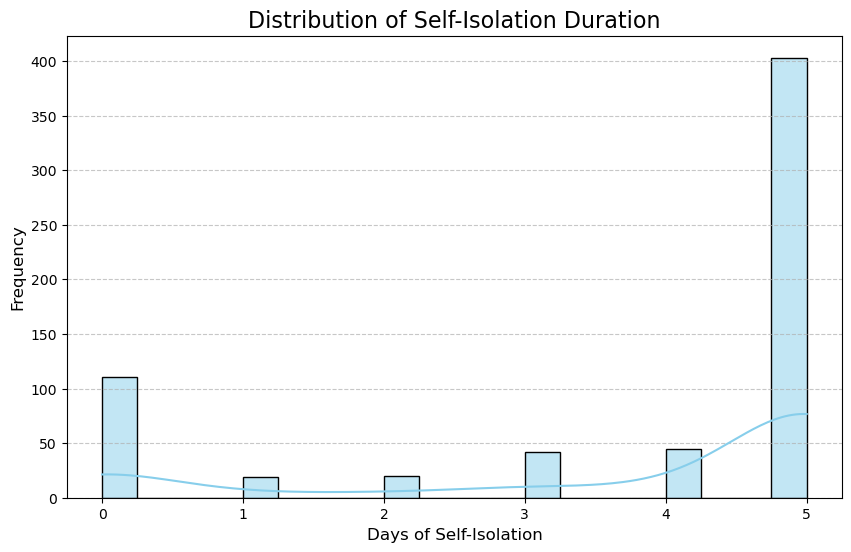

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram, bins specifies number of equal width bins to divide the data into
# kde plots the probability density function
plt.figure(figsize=(10, 6))
sns.histplot(df["B2_cleaned"], bins=20, kde=True, color="skyblue")

# Customizable plot title and labels
plt.title("Distribution of Self-Isolation Duration", fontsize=16)
plt.xlabel("Days of Self-Isolation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Display the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

The histogram shows a highly skewed distribution, with a large peak around 30 days of self isolation. This indicated that many players spent close to a month in isolation

In [8]:
# Calculate basic statistics
print("Summary statistics for self-isolation duration (in days):")
print(df_cleaned["B2_cleaned"].describe())

Summary statistics for self-isolation duration (in days):
count    640.000000
mean       3.718750
std        1.946617
min        0.000000
25%        3.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: B2_cleaned, dtype: float64


In [9]:
from sklearn.model_selection import train_test_split

# Feature
X = df_cleaned.drop(columns=["B2_cleaned"])

# Target
y = df_cleaned["B2_cleaned"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
print(X_train.shape, X_test.shape)

(512, 94) (128, 94)


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Apply label encoding to the entire DataFrame (if needed)
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])


In [14]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=43)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Check the model's accuracy on the training set
train_accuracy = rf_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Training Accuracy: 100.00%
